In [2]:
import numpy as np

from assignments.assignment_1 import (
    calculate_average_firing_rate,
    calculate_spike_times,
    calculate_tau0,
    calculate_waiting_time,
    exponensial_pdf,
    fit_exponential_distribution,
    fit_pdf,
    plot_waiting_time_distribution,
)
from assignments.config import *
from assignments.load_data import load_data

In [2]:
data = load_data("Data_neuron.txt")
waiting_time = calculate_waiting_time(data)
waiting_time = np.sort(waiting_time)[::-1]

data/Data_neuron.txt


In [3]:
tau0 = calculate_tau0(waiting_time)
params = fit_exponential_distribution(waiting_time)
lambda_estimate = 1 / params[1]

tau = np.linspace(0, max(waiting_time), DATA_POINTS)
pdf_fitted = fit_pdf(waiting_time, tau)
pdf_values = exponensial_pdf(lambda_estimate, tau0, tau)

In [6]:
def interface_waiting_time_plot(
    enable_exponential_distribution=False,
    enable_exponential_fit=False,
    enable_tau0=False,
):
    plot_waiting_time_distribution(
        waiting_time,
        tau,
        tau0,
        lambda_estimate,
        pdf_fitted,
        pdf_values,
        enable_exponential_distribution=enable_exponential_distribution,
        enable_exponential_fit=enable_exponential_fit,
        enable_tau0=enable_tau0,
    )

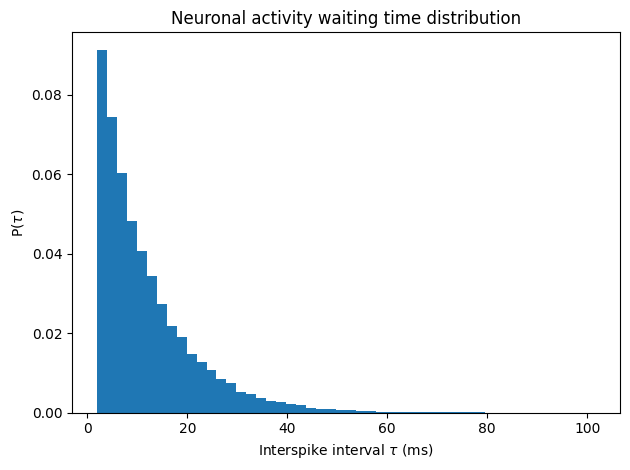

In [ ]:
interface_waiting_time_plot(enable_tau0=True)

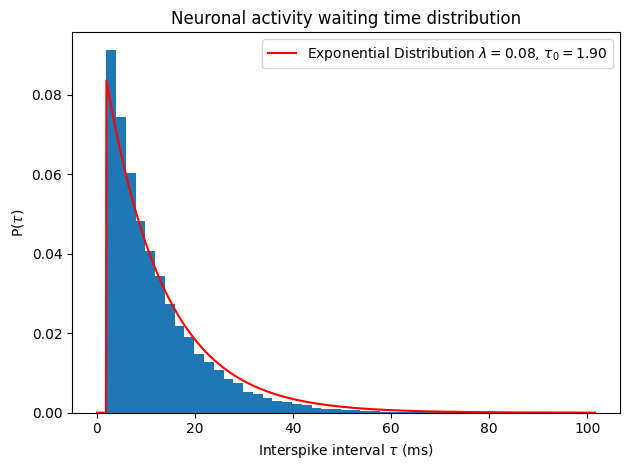

In [ ]:
interface_waiting_time_plot(enable_exponential_fit=True)

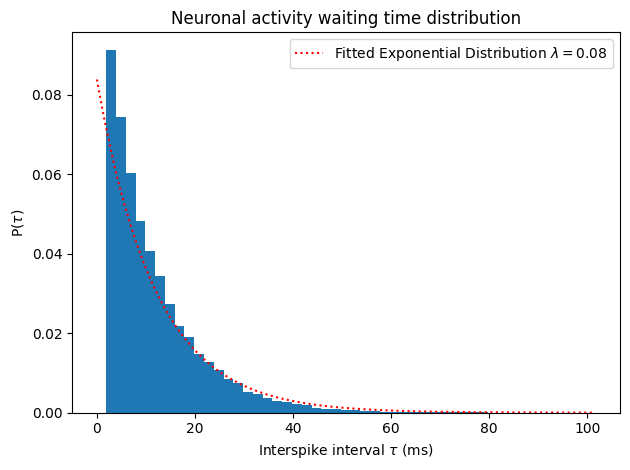

In [ ]:
interface_waiting_time_plot(enable_exponential_distribution=True)

In [11]:
spike_times = calculate_spike_times(lambda_estimate, tau0)
f = calculate_average_firing_rate(spike_times)
print(f"Average firing rate: {f:.2f} Hz")

Average firing rate: 0.50 Hz


------------------
# 2 Modeling binary data with the Ising model
## 2.1 Pairwise spin model

**Q1.1:** <br>
In the sum over all $pairs(i,j)$, there are $2\cdot D$ terms, where $D$ is the number of dimensions in the model, given a Von Neumann neighbourhood.
<br><br>
In the vector $\textbf{g}$, there are $N \cdot (N-1)$ parameters.
<br><br>
$$
\left( \sum^n_{i=1}h_is_i + \sum_{i=1} \sum_{\substack{j=1 \\ j \neq i}} J_{ij}s_is_j\right)
$$

**Q1.2:** <br>
for $n=3$
$$
\begin{align*}
\textbf{g}=(h_1, h_2, h_3, J_{1,2}, J_{2,3})
\end{align*}
$$
$$
\begin{align*}
p_{\textbf{g}}(s) = \frac{1}{Z(\textbf{g})}\exp\left(\sum^3_{i=1}h_i s_i + \sum_{pair(i,j)}J_{ij}s_i s_j \right)
\end{align*}
$$

**Q1.3:** *<br>
Boltzmann distribution
$$
\begin{align*}
P(s)=\frac{\exp(-\beta E(s))}{Z}
\end{align*}
$$
Hereby the energy function is the following, assuming that $\beta=1$:
$$
\begin{align*}
E(s)&=\left(\sum^n_{i=1}h_i s_i + \sum_{pair(i,j)}J_{ij}s_i s_j \right) \\

Z&=\sum_{s_1, \ldots, s_n} = \exp\left(\sum^n_{i=1}h_i s_i + \sum_{pair(i,j)}J_{ij}s_i s_j \right)
\end{align*}
$$

**Q1.4:** * <br>
If $h_i$ is positive, the direction of $s_i$ will also want to be positive, to give the lowest acssociated energy $-h_is_i$.
<br>
If $J_{ij}$ is positive the alignment of the spins should be in the same direction, as this wil make the product $1$ and will minimize the coupling energy $-J_{ij}s_i s_j$
<br>
Hereby $h_i$ ... and $J_{ij}$ is how the connected the judges are with each other.

## 2.2 Observables

**Q2.1:** <br>
$\langle s_i \rangle$ is the average

**Q2.2:** <br>


**Q2.3:** <br>


## 2.3 Maximum Entropy models


**Q3.1:** <br>
For Shannon entropy, whereby $k_B=1$

$$
S\left[p(s)\right] = - \sum_{s}p(s)\log p(s)
$$

**Q3.2:** <br>
1. The normalization constraint has 1 constraint
2. The magnetization constraint has $n$ constraints (for each $i$)
3. The correlation constraint has a constraint for each unique pair $\binom{n}{2}$

This results in a total of:
$$
1 + n + \frac{n(n-1)}{2}
$$

$$U[p(s)] = - \sum_{s}p(s)\log p(s) + \lambda_0\left(\sum_s p(s) - 1 \right) + \sum^n_{i=1} \alpha_i \left(\sum_s p(s) s_i(s) - \langle s_i \rangle_D \right) + \sum^n_{pair(i,j)} \eta_{ij} \left(\sum_s p(s) s_i(s) s_j(s) - \langle s_i s_j \rangle_D \right) \\$$

**Q3.3:** <br>
$$
U[p(s)] = S[p(s)] + \lambda_0\left(\sum_s p(s) - 1 \right) + \sum^n_{i=1} \alpha_i \left(\sum_s p(s) s_i(s) - \langle s_i \rangle_D \right) + \sum^n_{pair(i,j)} \eta_{ij} \left(\sum_s p(s) s_i(s) s_j(s) - \langle s_i s_j \rangle_D \right) \\
$$
Subsitute the Shannon entropy equation for $S[p(s)]$:

$$
U[p(s)] = - \sum_{s}p(s)\log p(s) + \lambda_0\left(\sum_s p(s) - 1 \right) + \sum^n_{i=1} \alpha_i \left(\sum_s p(s) s_i(s) - \langle s_i \rangle_D \right) + \sum^n_{pair(i,j)} \eta_{ij} \left(\sum_s p(s) s_i(s) s_j(s) - \langle s_i s_j \rangle_D \right) \\
$$
Given that we have a fixed state of $s$:
$$
\begin{align*}
U[p(s)] &= - p(s)\log p(s) + \lambda_0\left(p(s) - 1 \right) + \sum^n_{i=1} \alpha_i \left(p(s) s_i(s) - \langle s_i \rangle_D \right) + \sum^n_{pair(i,j)} \eta_{ij} \left(p(s) s_i(s) s_j(s) - \langle s_i s_j \rangle_D \right) \\

\end{align*}
$$
.
$$
\frac{\partial U[p]}{\partial p_s} = -\log p_s - 1 + \lambda_0 + \sum^n_{i=1} \alpha_i s_i (s) + \sum^n_{pair(i,j)} \eta_{ij} s_i(s) s_j(s) s
$$

**Q3.4:** <br>


## 2.4 Statistical inference: model with no couplings

**Q4.1:** <br>

**Q4.2:** <br>

**Q4.3:** <br>


## 2.5 Statisical inference: maximizing the log-likelihood function

**Q5.1:** <br>

**Q5.2:** <br>

-----
# 3 Application to te analysis of the US supreme Court

In [3]:
data = load_data("US_SupremeCourt_n9_N895.txt", "str")

**Q6.1:** <br>

In [4]:
N, n = data.shape
print(f"Number of spin variables: {n}")
print(f"Number of data points: {N}")

Number of spin variables: 9
Number of data points: 895


**Q6.2: (bonus question)** <br>

**Q6.3:** <br>

**Q6.4:** <br>

**Q6.5:** <br>

**Q6.6:** <br>

**Q6.7:** <br>

**Q6.8:** <br>

**Q6.9:** <br>

-------
# 4 Bonus questions: Fisher Information Matix and multi-dimensional fluctuation-dissipation theorem